In [1]:
#@title Imports and defaults
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

import platform
print("python %s" % platform.python_version())
print("matplotlib %s" % mpl.__version__)

from simulator import *
from algorithms import *
from deep import *

'''
from colabtools import adhoc_import
with adhoc_import.Google3CitcClient("bandits", "bkveton"):
  from google3.experimental.users.bkveton.bandits.simulator import *
  from google3.experimental.users.bkveton.bandits.algorithms import *
  from google3.experimental.users.bkveton.bandits.phe import *
  from google3.experimental.users.bkveton.bandits.deep import *
'''

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

python 3.6.9
matplotlib 3.2.2
Instructions for updating:
non-resource variables are not supported in the long term


python 3.6.9
tf 2.2.0
keras 2.3.0-tf
Preprocessing dataset mnist...
60000 examples, 784 features, 10 labels
Evaluating DeepFPLWARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
..... 151.2 seconds
Regret: 5152.00 +/- 60.92 (median: 5065.00, max: 5384.00, min: 5035.00)
Reward in last 1000 rounds: 521.00 +/- 9.35
Evaluating Deep History Swapping..... 163.2 seconds
Regret: 5075.20 +/- 85.86 (median: 4992.00, max: 5387.00, min: 4844.00)
Reward in last 1000 rounds: 530.20 +/- 14.26
Evaluating Deep History Swapping..... 162.2 seconds
Regret: 5035.40 +/- 80.48 (median: 4972.00, max: 5375.00, min: 4845.00)
Reward in last 1000 rounds: 523.80 +/- 5.35
Evaluating Deep History Swapping..... 161.0 

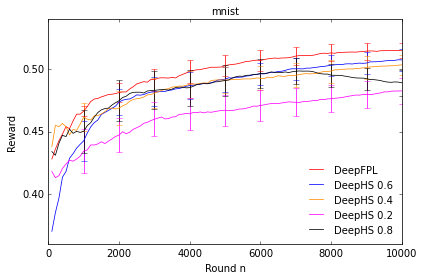

python 3.6.9
tf 2.2.0
keras 2.3.0-tf
Preprocessing dataset fashion_mnist...
60000 examples, 784 features, 10 labels
Evaluating DeepFPL..... 151.8 seconds
Regret: 4846.60 +/- 115.32 (median: 4823.00, max: 5254.00, min: 4483.00)
Reward in last 1000 rounds: 523.20 +/- 12.18
Evaluating Deep History Swapping..... 165.4 seconds
Regret: 4806.00 +/- 87.04 (median: 4870.00, max: 5102.00, min: 4565.00)
Reward in last 1000 rounds: 492.40 +/- 9.62
Evaluating Deep History Swapping..... 164.1 seconds
Regret: 4748.00 +/- 119.45 (median: 4809.00, max: 5156.00, min: 4442.00)
Reward in last 1000 rounds: 496.20 +/- 12.95
Evaluating Deep History Swapping..... 160.8 seconds
Regret: 4638.80 +/- 60.49 (median: 4671.00, max: 4817.00, min: 4469.00)
Reward in last 1000 rounds: 483.40 +/- 10.56
Evaluating Deep History Swapping..... 166.5 seconds
Regret: 4612.00 +/- 78.65 (median: 4500.00, max: 4924.00, min: 4453.00)
Reward in last 1000 rounds: 427.20 +/- 16.53


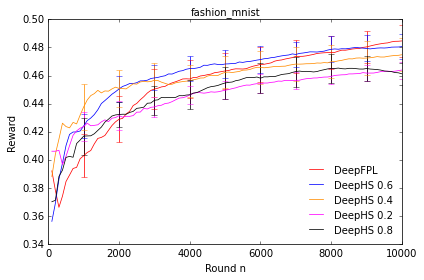

In [2]:
# experiments
num_runs = 5
n = 10000

# neural nets
hidden_nodes = "50-50"
hidden_activation = "relu"
optimizer = "adam"
lr = 0.001
batch_size = 32
deeps = [
  # ("DeepFPL",
  # {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  # "optimizer": optimizer, "lr": lr, "batch_size": batch_size},
  # "blue", "-", "DeepFL"),
  ("DeepFPL",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "a": 1.0},
  "red", "-", "DeepFPL"),
  # ("NeuralLinear",
  # {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  # "lr": lr, "batch_size": batch_size, "a": 1.0, "relepe": int(0.05 * n)},
  # "cyan", "-", "NeuralLinear 5%"),
  # ("DeepHS",
  # {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  # "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.1},
  # "gold", "-", "DeepHS 0.1"),
  # ("DeepHS",
  # {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  # "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.15},
  # "cyan", "-", "DeepHS 0.15"),
  # ("DeepHS",
  # {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  # "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.2},
  # "darkgreen", "-", "DeepHS 0.2"),
  ("DeepHS",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.65},
  "blue", "-", "DeepHS 0.6"),
  ("DeepHS",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.4},
  "darkorange", "-", "DeepHS 0.4"),
  ("DeepHS",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.2},
  "magenta", "-", "DeepHS 0.2"),
  ("DeepHS",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.8},
  "black", "-", "DeepHS 0.8"),
]

step = 100 * (np.arange(n // 100) + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

for dataset in ["mnist", "fashion_mnist"]:
  # create environment
  X, y = load_dataset(dataset,1)
  num_labels = int(y.max()) + 1

  for alg in deeps:
    env = []
    for run in range(num_runs):
      c = run % num_labels
      env.append(BinaryClassBandit(X, y, pos_label=c, K=10, pos_prob=0.65))

    alg_class = globals()[alg[0]]
    reward, _ = evaluate(alg_class, alg[1], env, n)
    print("Reward in last %d rounds: %.2f +/- %.2f" %
      (n // 10, reward[- n // 10 :, :].sum(axis=0).mean(), \
      reward[- n // 10 :, :].sum(axis=0).std() / np.sqrt(num_runs)))

    cum_reward = reward.cumsum(axis=0)[step - 1, :] / step[:, np.newaxis]
    plt.plot(step, cum_reward.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]), label=alg[4])
    plt.errorbar(step[sube], cum_reward[sube, :].mean(axis=1),
      cum_reward[sube, :].std(axis=1) / np.sqrt(cum_reward.shape[1]),
      fmt="none", ecolor=alg[2])

  plt.title("%s" % dataset)
  plt.xlabel("Round n")
  plt.ylabel("Reward")
  plt.legend(loc="lower right", frameon=False)
  plt.tight_layout()
  plt.savefig(open('widerange_'+dataset+'_reward_results.jpeg', 'wb'), format="jpeg", dpi=1200, bbox_inches=0)
  plt.show()

python 3.6.9
tf 2.2.0
keras 2.3.0-tf
Preprocessing dataset mnist...
60000 examples, 784 features, 10 labels
Evaluating Deep History Swapping..... 165.5 seconds
Regret: 5077.40 +/- 71.95 (median: 5116.00, max: 5261.00, min: 4789.00)
Reward in last 1000 rounds with swap_prob 0.60: 515.80 +/- 2.18
Evaluating Deep History Swapping..... 166.6 seconds
Regret: 5046.60 +/- 79.58 (median: 5053.00, max: 5276.00, min: 4770.00)
Reward in last 1000 rounds with swap_prob 0.65: 534.40 +/- 6.94
Evaluating Deep History Swapping..... 166.4 seconds
Regret: 4973.40 +/- 65.37 (median: 4959.00, max: 5197.00, min: 4766.00)
Reward in last 1000 rounds with swap_prob 0.70: 498.60 +/- 12.15
Evaluating Deep History Swapping..... 166.7 seconds
Regret: 4987.40 +/- 78.10 (median: 4915.00, max: 5248.00, min: 4773.00)
Reward in last 1000 rounds with swap_prob 0.75: 484.00 +/- 17.37
Evaluating Deep History Swapping..... 166.6 seconds
Regret: 4899.80 +/- 60.15 (median: 4921.00, max: 5025.00, min: 4646.00)
Reward in last

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


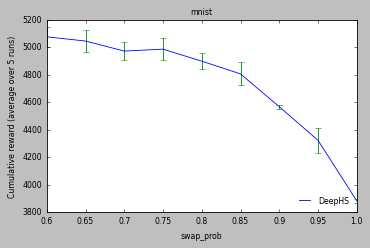

python 3.6.9
tf 2.2.0
keras 2.3.0-tf
Preprocessing dataset fashion_mnist...
60000 examples, 784 features, 10 labels
Evaluating Deep History Swapping..... 166.2 seconds
Regret: 4901.00 +/- 98.59 (median: 4846.00, max: 5283.00, min: 4640.00)
Reward in last 1000 rounds with swap_prob 0.60: 507.40 +/- 7.74
Evaluating Deep History Swapping..... 168.3 seconds
Regret: 4855.40 +/- 71.95 (median: 4770.00, max: 5118.00, min: 4679.00)
Reward in last 1000 rounds with swap_prob 0.65: 499.40 +/- 10.17
Evaluating Deep History Swapping..... 167.8 seconds
Regret: 4816.20 +/- 99.59 (median: 4825.00, max: 5192.00, min: 4553.00)
Reward in last 1000 rounds with swap_prob 0.70: 491.80 +/- 18.02
Evaluating Deep History Swapping..... 169.4 seconds
Regret: 4690.40 +/- 127.14 (median: 4540.00, max: 5189.00, min: 4401.00)
Reward in last 1000 rounds with swap_prob 0.75: 462.80 +/- 22.27
Evaluating Deep History Swapping..... 167.7 seconds
Regret: 4598.80 +/- 119.15 (median: 4546.00, max: 5030.00, min: 4315.00)
Rew

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


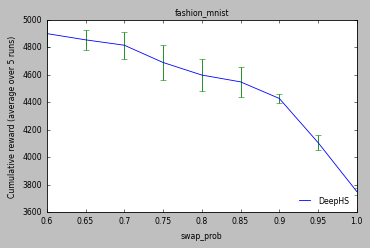

In [4]:
# experiments
num_runs = 5
n = 10000

# neural nets
hidden_nodes = "50-50"
hidden_activation = "relu"
optimizer = "adam"
lr = 0.001
batch_size = 32

swap_probs = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0] 
#[0, 3e-3, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 
              #0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
swap_probs_labels = ['0.6', '0.65', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95', '1.0']
#['0', '3e-3', '0.1', '0.15', '0.2', '0.25', '0.3', 
                  #'0.35', '0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75'] 
x_axis = np.arange(len(swap_probs))

deeps = ["DeepHS"]
paras = {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "swap_prob": 0.}

step = 100 * (np.arange(n // 100) + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

for dataset in ["mnist", "fashion_mnist"]:
  # create environment
  X, y = load_dataset(dataset,1)
  num_labels = int(y.max()) + 1

  for alg in deeps:
    reward_means = []
    reward_vars = []
    for swap_prob in swap_probs:
      env = []
      paras['swap_prob'] = swap_prob
      for run in range(num_runs):
        c = run % num_labels
        env.append(BinaryClassBandit(X, y, pos_label=c, K=10, pos_prob=0.65))

      alg_class = globals()[alg]
      reward, _ = evaluate(alg_class, paras, env, n)
      print("Reward in last %d rounds with swap_prob %.2f: %.2f +/- %.2f" %
        (n // 10, swap_prob, reward[- n // 10 :, :].sum(axis=0).mean(), \
        reward[- n // 10 :, :].sum(axis=0).std() / np.sqrt(num_runs)))

      cum_reward = reward.sum(axis=0) 
      reward_means.append(cum_reward.mean())
      reward_vars.append(cum_reward.std() / np.sqrt(cum_reward.shape))
      
      # plt.plot(step, cum_reward.mean(axis=1),
      #   alg[2], dashes=linestyle2dashes(alg[3]), label=alg[4])
      # plt.errorbar(step[sube], cum_reward[sube, :].mean(axis=1),
      #   cum_reward[sube, :].std(axis=1) / np.sqrt(cum_reward.shape[1]),
      #   fmt="none", ecolor=alg[2])

    plt.plot(x_axis, reward_means, 
             dashes=linestyle2dashes('-'), label=alg)
    plt.errorbar(x_axis, reward_means, reward_vars, fmt="none")
    plt.xticks(x_axis, swap_probs_labels)

  plt.title("%s" % dataset)
  plt.xlabel("swap_prob")
  plt.ylabel("Cumulative reward (average over %d runs)" % num_runs)
  plt.legend(loc="lower right", frameon=False)
  plt.savefig(open('tune_big_' + dataset+'_reward_results.jpeg', 'wb'), 
              format="jpeg", bbox_inches=0)
  plt.show()